<class 'pandas.core.frame.DataFrame'>
explained variance: [0.42066257 0.25318696 0.09596791 0.0538417  0.05181136 0.03365971
 0.03077291 0.01911368]
PCAmatrix：
 [[ 7.13587623e-02 -5.01351345e-02 -2.98435604e-01 -2.98551165e-01
  -2.95426672e-01 -2.99211306e-01 -3.00979914e-01 -2.99773193e-01
  -3.00398382e-01 -3.01894036e-01 -3.00339955e-01 -1.66808037e-01
  -3.02741203e-02 -1.19721849e-01 -1.19721849e-01  3.20516260e-02
  -2.11235389e-02 -5.88792468e-02  1.07731230e-01  1.09747078e-01
  -2.08917095e-01 -1.34287211e-01 -9.26876675e-02 -1.68213209e-01
   2.81497092e-02]
 [ 3.47174585e-01  1.91726916e-01  7.53894724e-02  7.29019699e-02
   6.49193879e-02  6.57259920e-02  6.39740061e-02  5.76526942e-02
   5.46276779e-02  5.26601247e-02  4.54346043e-02 -2.99690943e-01
  -2.53032221e-01 -3.16746522e-01 -3.16746522e-01 -3.85478962e-02
   4.52984735e-02 -3.20651239e-01  1.47147042e-01  1.63396798e-01
   1.92580510e-01 -1.37600509e-02  3.08146101e-01 -2.52335116e-01
  -3.20676832e-01]
 [ 6.5181

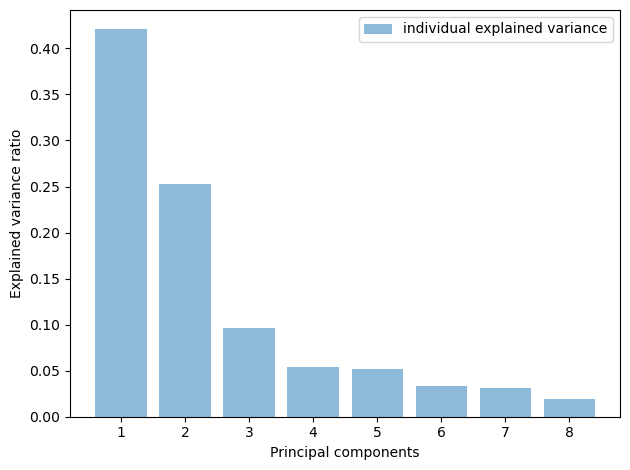

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_excel("D:\\python-learn\\zuoye\\pcadata.xlsx")

df = df.dropna()

print(type(df))


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=8) 

pca_results = pca.fit_transform(scaled_data)

print("explained variance:", pca.explained_variance_ratio_)
transformation_matrix = pca.components_
print("PCAmatrix：\n", transformation_matrix)

principal_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
print(principal_df)

output_file_path = 'D:\\python-learn\\zuoye\\Newpcadata2.xlsx'  
principal_df.to_excel(output_file_path, index=False)  

print("File saved successfully at:", output_file_path)

explained_variance = pca.explained_variance_ratio_


plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()




<class 'pandas.core.frame.DataFrame'>
explained variance: [0.42066257 0.25318696 0.09596791]
PCAmatrix：
 [[ 7.13587623e-02 -5.01351345e-02 -2.98435604e-01 -2.98551165e-01
  -2.95426672e-01 -2.99211306e-01 -3.00979914e-01 -2.99773193e-01
  -3.00398382e-01 -3.01894036e-01 -3.00339955e-01 -1.66808037e-01
  -3.02741203e-02 -1.19721849e-01 -1.19721849e-01  3.20516260e-02
  -2.11235389e-02 -5.88792468e-02  1.07731230e-01  1.09747078e-01
  -2.08917095e-01 -1.34287211e-01 -9.26876675e-02 -1.68213209e-01
   2.81497092e-02]
 [ 3.47174585e-01  1.91726916e-01  7.53894725e-02  7.29019699e-02
   6.49193876e-02  6.57259922e-02  6.39740062e-02  5.76526940e-02
   5.46276781e-02  5.26601248e-02  4.54346041e-02 -2.99690943e-01
  -2.53032221e-01 -3.16746522e-01 -3.16746522e-01 -3.85478962e-02
   4.52984736e-02 -3.20651239e-01  1.47147042e-01  1.63396798e-01
   1.92580510e-01 -1.37600509e-02  3.08146101e-01 -2.52335116e-01
  -3.20676832e-01]
 [ 6.51815662e-02  1.21357509e-01  1.15482565e-03  5.92798180e-03

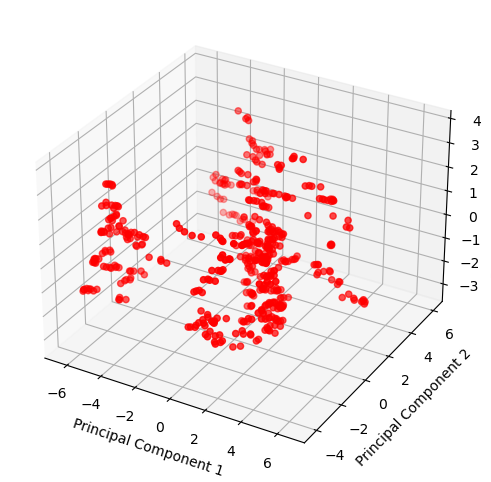

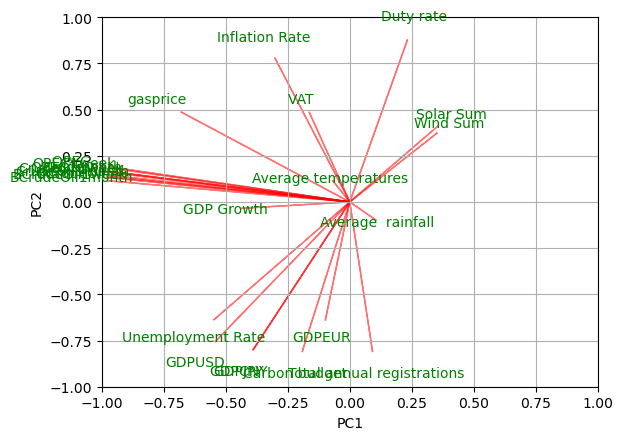

In [6]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd



df = pd.read_excel("D:\\python-learn\\zuoye\\pcadata.xlsx")

df = df.dropna()

print(type(df))


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=3)  


pca_results = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(data=pca_results, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3'])# 查看结果
print("explained variance:", pca.explained_variance_ratio_)
transformation_matrix = pca.components_
print("PCAmatrix：\n", transformation_matrix)


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'], df_pca['Principal Component 3'], c='r', marker='o')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

features = range(scaled_data.shape[1])

for i in features:
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, df.columns[i], color='g', ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

plt.show()

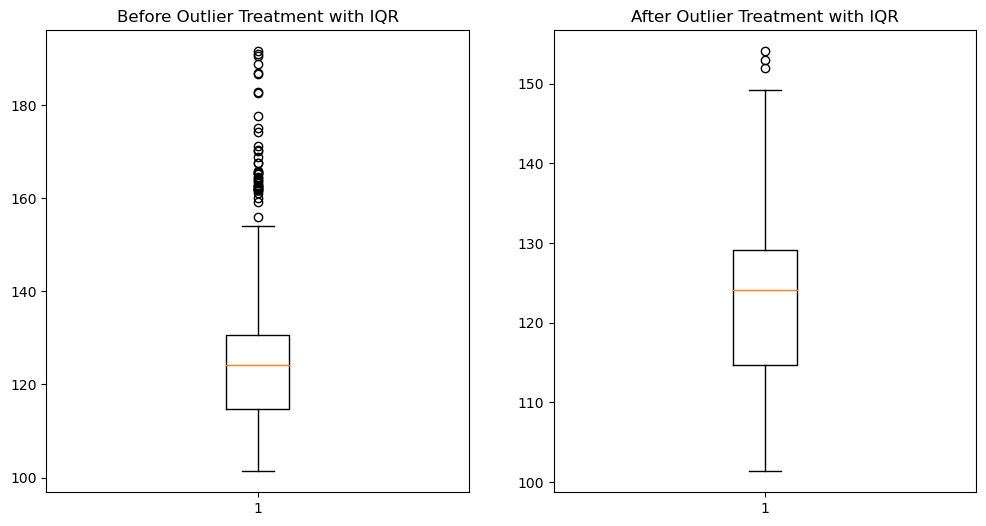

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file_path = 'D:\\python-learn\\zuoye\\before.xlsx'
df = pd.read_excel(file_path)


column_name = 'Data'  


df_original = df.copy()

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1


outlier_condition = ((df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR)))

median = df[column_name].median()
df.loc[outlier_condition, column_name] = median

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_original[column_name])
plt.title("Before Outlier Treatment with IQR")

plt.subplot(1, 2, 2)
plt.boxplot(df[column_name])
plt.title("After Outlier Treatment with IQR")

plt.show()